# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 26 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: C:\Users\Lenovo\Documents\Study\5term\MathStat\Pracs\2\Cauchy.csv

  0%|          | 0.00/18.7k [00:00<?, ?B/s]
100%|##########| 18.7k/18.7k [00:00<00:00, 9.37MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: C:\Users\Lenovo\Documents\Study\5term\MathStat\Pracs\2\Weibull.csv

  0%|          | 0.00/17.9k [00:00<?, ?B/s]
100%|##########| 17.9k/17.9k [00:00<00:00, 2.60MB/s]


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

np.random.seed(42)  # зафиксируем seed

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [3]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


Заметим, что
$$
\ln(p(x)) = \ln\left(\frac{1}{\pi(1 + (x-x_0)^2)}\right) =
\ln(1) - \ln\left(\pi\left(1 + (x-x_0)^2\right)\right) = -\ln(\pi) - \ln(1 + (x-x_0)^2)
$$

In [4]:
def multi_logMLE_cauchy_loc(sample_matr, x_0_matr):
    return -(len(sample_matr) * np.log(np.pi)) - np.sum(
        np.log(1 + np.square(sample_matr - x_0_matr)),
        axis=1
    )

def logMLE_cauchy_loc_estimator(sample, left, right, step):
    grid = np.arange(left, right + step, step)
    return grid[np.argmax(multi_logMLE_cauchy_loc(
        np.tile(sample, (len(grid), 1)),
        np.transpose(np.tile(grid, (len(sample), 1)))
    ))]

In [5]:
left = -1000
right = 1000
step = 0.01
sample_sizes = [
    10,
    100,
    len(sample_1)
]

logMLE_cauchy_loc_estimates = [
    logMLE_cauchy_loc_estimator(sample_1[:sample_size], left, right, step)
    for sample_size in sample_sizes
]

In [6]:
def print_estimates(title, estimates, labels):
    print(title)
    print('\n'.join(map(lambda p: ': '.join([p[0], str(p[1])]), zip(labels, estimates))))

In [7]:
size_labels = [str(sample_size)+' элементов' for sample_size in sample_sizes]
print_estimates('Оценки параметра сдвига распределения Коши', logMLE_cauchy_loc_estimates, size_labels)

Оценки параметра сдвига распределения Коши
10 элементов: 208.52999999890085
100 элементов: 207.89999999890142
1000 элементов: 207.97999999890135


Сравните полученные результаты с `sps.cauchy.fit`

In [8]:
scipy_cauchy_estimate = sps.cauchy.fit(sample_1)[0]
print('Оценка scipy:', scipy_cauchy_estimate, end='\n\n')
print_estimates(
    'Сравнение полученных оценок с оценкой scipy:',
    np.abs(logMLE_cauchy_loc_estimates - scipy_cauchy_estimate),
    size_labels
)

Оценка scipy: 207.97772827944334

Сравнение полученных оценок с оценкой scipy:
10 элементов: 0.552271719457508
100 элементов: 0.07772828054191905
1000 элементов: 0.0022717194580081923


## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [9]:
sample_2 = np.loadtxt("Weibull.csv")

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

sample_2_drop0 = sample_2[sample_2 > 0]
ecdf = ECDF(sample_2_drop0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


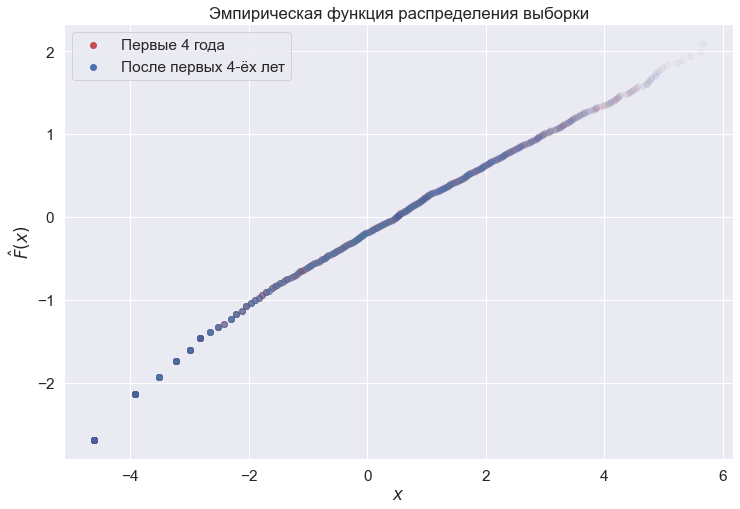

In [11]:
def calc_weibull_plot_data(sample, ecdf):
    return (
        np.log(sample),
        np.log(-np.log(1 - ecdf(sample)))
    )

def plot_ecdf(sample, split_index, ecdf):
    plt.figure(figsize=(12, 8))
    plt.title('Эмпирическая функция распределения выборки')
    plt.xlabel('$x$')
    plt.ylabel(r'$\hat{F}(x)$')
    split_drop0_sample = [
        data[data != 0]
        for data in np.split(sample, [split_index])
    ]
    weibull_plot_data = [
        calc_weibull_plot_data(data, ecdf)
        for data in split_drop0_sample
    ]
    plt.scatter(
        *weibull_plot_data[0],
        color='r',
        alpha=0.05,
        label='Первые 4 года'
    )
    plt.scatter(
        *weibull_plot_data[1],
        color='b',
        alpha=0.05,
        label='После первых 4-ёх лет'
    )
    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

years4 = 1461
plot_ecdf(sample_2, years4, ecdf)

Сделайте вывод.

**Вывод:** $y'$ зависит от $x'$ линейно, то есть $y'=kx'+a$

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

Заметим, что
$$
\log_{10}(p(x)) = \log_{10}\left(\gamma \cdot x^{\gamma - 1} \cdot e^{-x^\gamma}\right) =
\log_{10}\gamma + \log_{10}x^{\gamma - 1} + \log_{10}e^{-x^\gamma} =
\log_{10}\gamma + (\gamma - 1) \cdot \log_{10}x - x^\gamma \cdot \log_{10}e
$$

In [12]:
def multi_log10MLE_weibull(sample_matr, log10_gamma_matr):
    gamma_matr = 10 ** log10_gamma_matr
    return np.sum(
        log10_gamma_matr +\
        (gamma_matr - 1) * np.log10(sample_matr) -\
        np.log10(np.e) * (sample_matr ** gamma_matr),
        axis=1
    )

def log10MLE_weibull_estimator(sample, left, right, step):
    grid = np.arange(left, right + step, step)
    return grid[np.argmax(multi_log10MLE_weibull(
        np.tile(sample, (len(grid), 1)),
        np.transpose(np.tile(grid, (len(sample), 1)))
    ))]

left = -2
right = 2
step = 0.001

k = [years4, len(sample_2)]
drop0_samples = [
    data[data != 0]
    for data in
    [sample_2[:i] for i in k]
]
MLE_weibull_estimates = [
    10 ** log10MLE_weibull_estimator(sample, left, right, step)
    for sample in drop0_samples
]
labels = [
    'Оценка по первым 4-ём годам',
    'Оценка по всей выборке'
]

In [13]:
print_estimates('Оценка параметра распределения Вейбулла', MLE_weibull_estimates, labels)

Оценка параметра распределения Вейбулла
Оценка по первым 4-ём годам: 0.41783036664645
Оценка по всей выборке: 0.41020410298643906


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [14]:
scipy_weibull_estimate = sps.weibull_min.fit(sample_2_drop0, fscale=1, floc=0)[0]
print('Оценка scipy параметра распределения Вейбулла', scipy_weibull_estimate, end='\n\n')
print_estimates('Сравнение с оценкой scipy', np.abs(MLE_weibull_estimates - scipy_weibull_estimate), labels)

Оценка scipy параметра распределения Вейбулла 0.41025390624999947

Сравнение с оценкой scipy
Оценка по первым 4-ём годам: 0.007576460396450546
Оценка по всей выборке: 4.980326356041065e-05


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод:** линии графиков $y = \gamma \cdot x$ параллельны линии, образуемой точками выборки. Это означает, что в законе о линейной зависимости $y'=kx'+a$, который мы вывели ранее, коэффициент $k$ является параметром $\gamma$ распределения Вейбулла.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


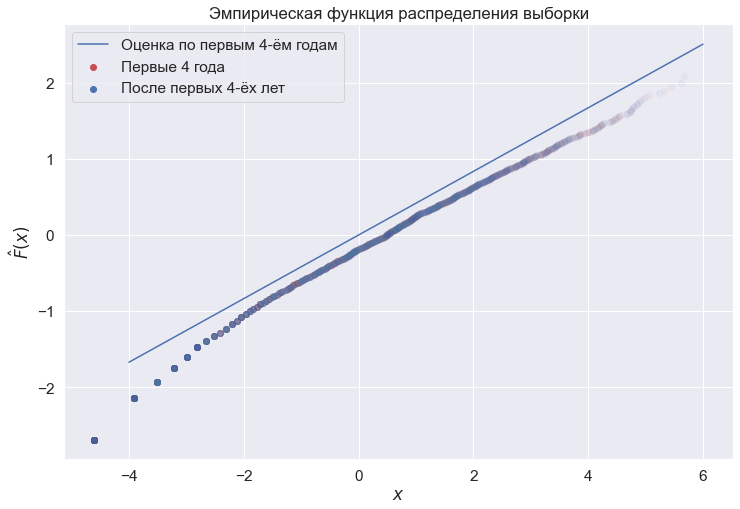

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


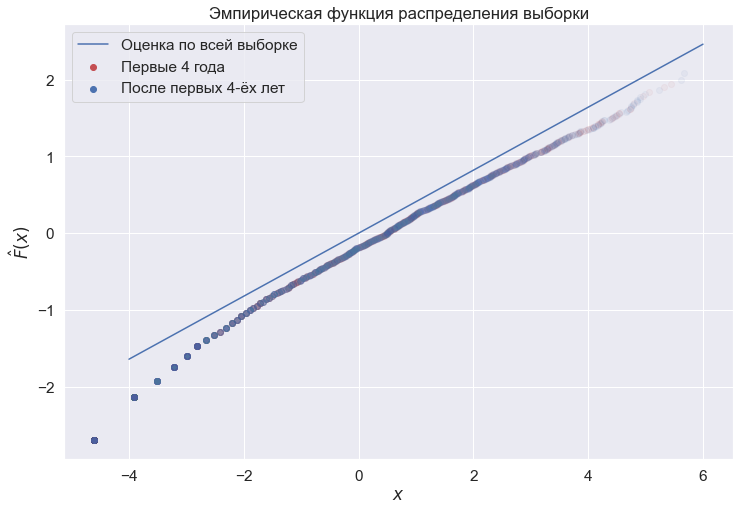

In [15]:
grid = np.linspace(-4, 6, 2)


for i in range(len(labels)):
    plot_ecdf(sample_2, years4, ecdf)
    plt.plot(
        grid,
        grid * MLE_weibull_estimates[i],
        label=labels[i]
    )
    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    plt.show()

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathcal{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [16]:
# Константы

N = 1000
theta = 3

In [17]:
# Генерируем выборки

dists = {
    'N': sps.norm(loc=0, scale=np.sqrt(theta)),
    'U': sps.uniform(0, theta),
    'G': sps.gamma(a=theta)
}

dists_latex = {
    'N': r'$\mathcal{N}(0, \theta)$',
    'U': r'$U(0, \theta)$',
    'G': r'$\Gamma(1, \theta)$'
}

samples = {
    name: dist.rvs(size=N) for name, dist in dists.items()
}

### Оценки по методу моментов:
- $\mathcal{N}(0,\theta)$: $s^2$
- $U(0,\theta)$: $\hat\theta = \overline{X} + \sqrt{3}s$
- $\Gamma(1,\theta)$: $\hat\theta = \overline X$

In [18]:
# Полезные вспомогательные функции для подсчётся
# кумулятивного выборочного среднего и кумулятивной выборочной дисперсии

def cum_mean(sample):
    return np.cumsum(sample, axis=len(np.shape(sample)) - 1) / (np.arange(1, len(sample) + 1))

def cum_var(sample):
    return cum_mean(sample ** 2) - (cum_mean(sample) ** 2)

In [19]:
# Определяем оценки

estimators = {
    'N': lambda sample: cum_var(sample),
    'U': lambda sample: cum_mean(sample) + np.sqrt(3 * cum_var(sample)),
    'G': lambda sample: cum_mean(sample)
}

estimators_latex = {
    'N': r'$s^2$',
    'U': r'$\overline{X} + \sqrt{3}s$',
    'G': r'$\overline{X}$'
}

estimates = {
    name: estimator(samples[name]) for name, estimator in estimators.items()
}

In [20]:
# Функция постройки графика ошибки оценки

def plot_estimator_error(start, estimate, estimator_latex, dist_latex):
    plt.figure(figsize=(12, 8))
    plt.title(
        r'Зависимость ошибки оценки параметра $\theta$ распределения {} от размера выборки'
        .format(dist_latex)
    )
    plt.xlabel('Размер выборки')
    plt.ylabel(r'$|\hat\theta - \theta|_{l_1}$')
    plt.plot(
        np.arange(start, len(estimate) + 1),
        np.abs(estimate[start - 1:] - theta),
        label=r'{}'.format(estimator_latex)
    )
    plt.legend()

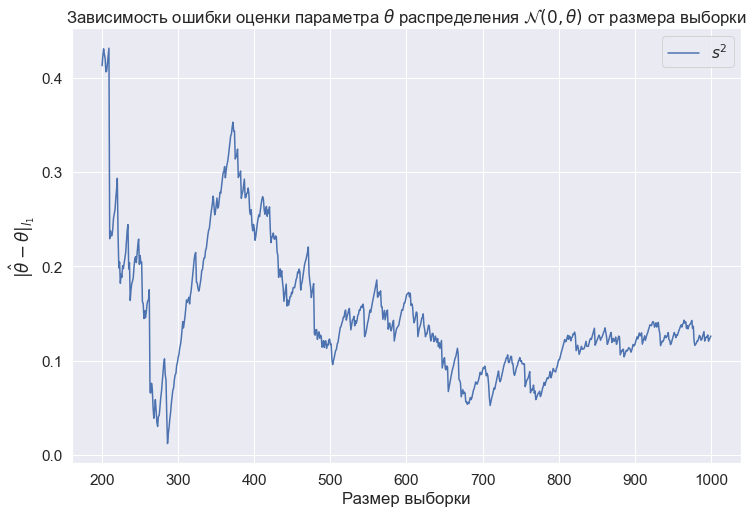

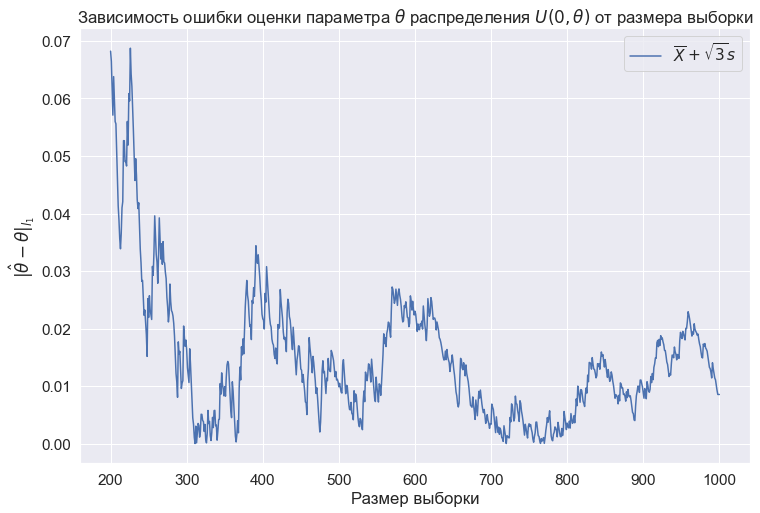

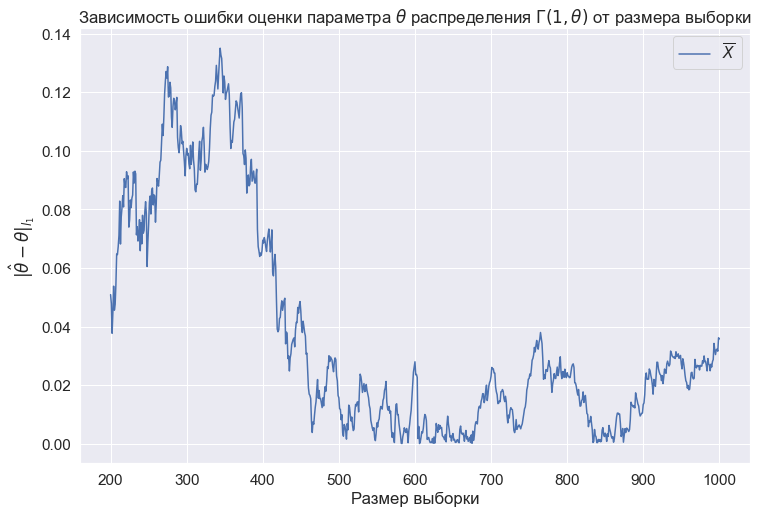

In [21]:
for dist_name, estimate in estimates.items():
    plot_estimator_error(
        200,
        estimate,
        estimators_latex[dist_name],
        dists_latex[dist_name]
    )

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [22]:
# Генерируем бутстрепы

k = [10] + [50] + list(range(100, 1001, 100))

def gen_bootstraps(sample, k):
    return [np.random.choice(sample[:i], size=(i, i)) for i in k]

bootstraps = {
    dist_name: gen_bootstraps(sample, k)
    for dist_name, sample in samples.items()
}

In [23]:
# Считаем бутстрепные оценки

def calc_bootstrap_estimate(bootstrap, estimator):
    return [estimator(k_bootstrap) for k_bootstrap in bootstrap]

bootstrap_estimates = {
    dist_name: calc_bootstrap_estimate(bootstrap, estimators[dist_name])
    for dist_name, bootstrap in bootstraps.items()
}

In [24]:
# Считаем среднее, стандартное отклонение и медиану бутстрепных оценок
import numpy.ma as ma

stats = [
    ('mean', np.mean),
    ('std', np.var)
]

def calc_bootstrap_estimates_stats(bootstrap_estimates, stat_func):
    return np.array([
        stat_func(k_bootstrap_estimates) for k_bootstrap_estimates in bootstrap_estimates
    ])

bootstrap_estimates_stats = {
    dist_name: {
        stat_name: calc_bootstrap_estimates_stats(
            bootstrap_estimate,
            stat_func
        )
        for stat_name, stat_func in stats
    }
    for dist_name, bootstrap_estimate in bootstrap_estimates.items()
}

In [25]:
def plot_bootstrap_estimate(k, bootstrap_estimate_stats, dist_latex, estimator_latex):
    plt.figure(figsize=(12, 8))
    plt.title(r'Зависимость значения бутстрепной оценки параметра $\theta$ распределения {}'
               ' от размера бутстрепной выборки'.format(dist_latex))
    plt.xlabel('Размер бутстрепной выборки')
    plt.ylabel('Значение оценки')
    plt.plot(
        k,
        bootstrap_estimate_stats['mean'],
        color='r',
        label=r'{}'.format(estimator_latex)
    )
    plt.fill_between(
        k,
        bootstrap_estimate_stats['mean'] - bootstrap_estimate_stats['std'],
        bootstrap_estimate_stats['mean'] + bootstrap_estimate_stats['std'],
        color='r',
        alpha=0.2,
        label=r'$\mu(k) \pm \sigma(\hat\theta)$'
    )
    plt.legend()

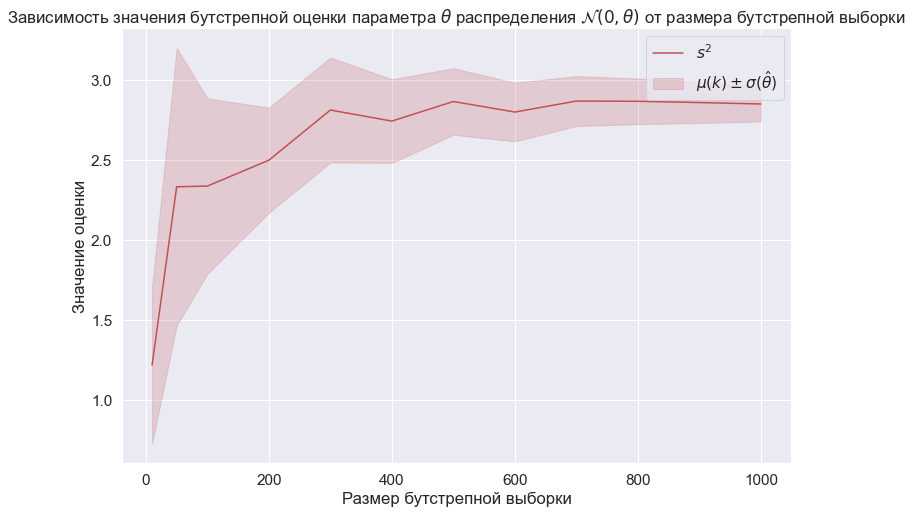

In [26]:
# Нормальное распределение
plot_bootstrap_estimate(
    k,
    bootstrap_estimates_stats['N'],
    dists_latex['N'],
    estimators_latex['N']
)

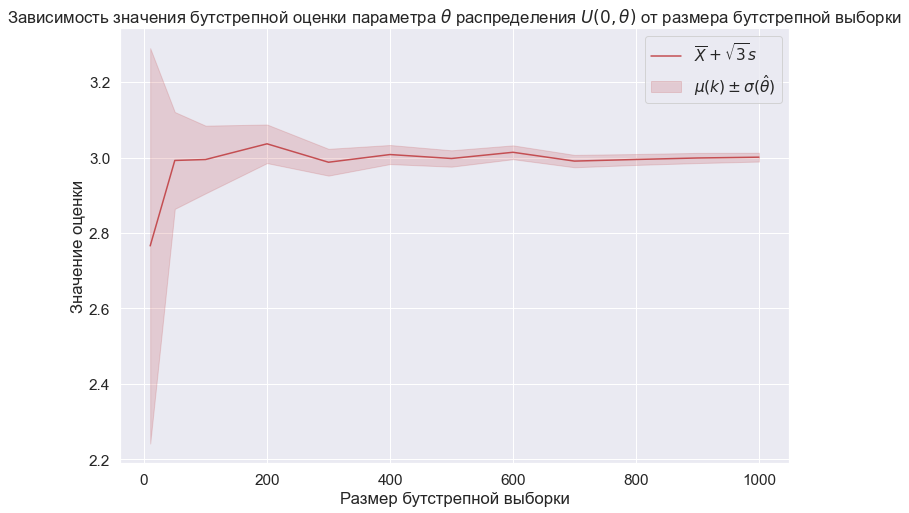

In [27]:
# Равномерное распределение
plot_bootstrap_estimate(
    k,
    bootstrap_estimates_stats['U'],
    dists_latex['U'],
    estimators_latex['U']
)

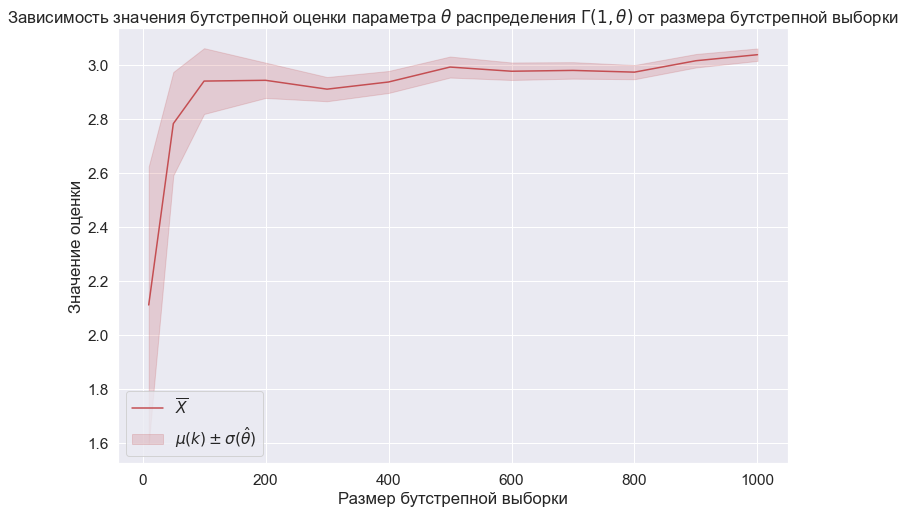

In [28]:
# Гамма-распределение
plot_bootstrap_estimate(
    np.array(k),
    bootstrap_estimates_stats['G'],
    dists_latex['G'],
    estimators_latex['G'],
)